In [1]:
import abstracts_analysis as aa
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer,\
                                            CountVectorizer

In [3]:
df = aa.load_to_df(choice='long')

Loading  ../data/arxiv_data_210930-054931.csv


In [4]:
documents = list(df['abstracts'])

In [5]:
documents[0:20]

["Graph neural networks (GNNs) have been widely used to learn vector\nrepresentation of graph-structured data and achieved better task performance\nthan conventional methods. The foundation of GNNs is the message passing\nprocedure, which propagates the information in a node to its neighbors. Since\nthis procedure proceeds one step per layer, the range of the information\npropagation among nodes is small in the lower layers, and it expands toward the\nhigher layers. Therefore, a GNN model has to be deep enough to capture global\nstructural information in a graph. On the other hand, it is known that deep GNN\nmodels suffer from performance degradation because they lose nodes' local\ninformation, which would be essential for good model performance, through many\nmessage passing steps. In this study, we propose multi-level attention pooling\n(MLAP) for graph-level classification tasks, which can adapt to both local and\nglobal structural information in a graph. It has an attention pooling

# Data exploring

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56181 entries, 0 to 56180
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   terms      56181 non-null  object
 1   titles     56181 non-null  object
 2   abstracts  56181 non-null  object
dtypes: object(3)
memory usage: 1.3+ MB
None


In [7]:
#histogram of lengths

In [8]:
abstract_lengths = [len(item) for item in df['abstracts']]

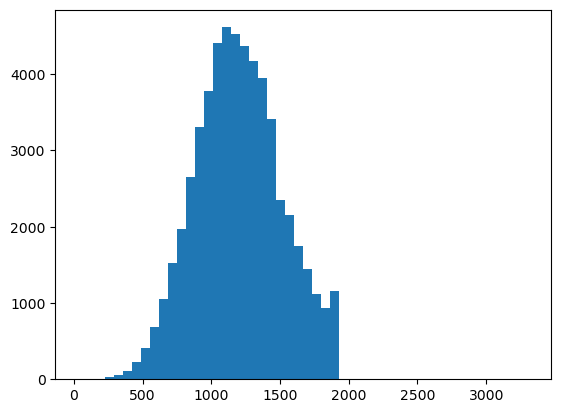

In [9]:
counts, edges = np.histogram(abstract_lengths, bins=50)
plt.stairs(counts, edges, fill=True)

In [10]:
# Topic modeling (use existing libraries)

In [11]:
no_features = 1000 # This is the number of different words to keep

In [12]:
# LDA uses raw term counts 

tf_vectorizer = CountVectorizer(max_df=0.95, 
                                min_df=2, 
                                max_features = no_features, 
                                stop_words = 'english')

In [13]:
tf = tf_vectorizer.fit_transform(documents)

In [14]:
tf_feature_names = tf_vectorizer.get_feature_names()

/home/gino/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [15]:
tf

<56181x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 3051538 stored elements in Compressed Sparse Row format>

In [16]:
tf_feature_names

['10',
 '2d',
 '3d',
 'ability',
 'able',
 'according',
 'account',
 'accuracy',
 'accurate',
 'accurately',
 'achieve',
 'achieved',
 'achieves',
 'achieving',
 'action',
 'actions',
 'active',
 'adapt',
 'adaptation',
 'adaptive',
 'addition',
 'additional',
 'additionally',
 'address',
 'advances',
 'advantage',
 'advantages',
 'adversarial',
 'agent',
 'agents',
 'aggregation',
 'ai',
 'aim',
 'aims',
 'al',
 'algorithm',
 'algorithms',
 'alignment',
 'allow',
 'allowing',
 'allows',
 'alternative',
 'analysis',
 'analyze',
 'annotated',
 'annotation',
 'annotations',
 'anomaly',
 'appearance',
 'application',
 'applications',
 'applied',
 'apply',
 'applying',
 'approach',
 'approaches',
 'approximate',
 'approximation',
 'arbitrary',
 'architecture',
 'architectures',
 'area',
 'areas',
 'art',
 'artificial',
 'aspects',
 'associated',
 'attack',
 'attacks',
 'attention',
 'attribute',
 'attributes',
 'augmentation',
 'augmented',
 'auto',
 'autoencoder',
 'automated',
 'automati

In [17]:
from sklearn.decomposition import LatentDirichletAllocation

no_topics = 20

# Run LDA
lda = LatentDirichletAllocation(n_components=no_topics, 
                                max_iter=5, 
                                learning_method='online', 
                                learning_offset=50.,
                                random_state=0).fit(tf)

In [18]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d:" % (topic_idx))
        print (" ".join([feature_names[i]
                        for i in topic.argsort()\
                        [:-no_top_words - 1:-1]]))

In [19]:
no_top_words = 10
display_topics(lda, tf_feature_names, no_top_words)

Topic 0:
3d object point detection depth scene objects cloud shape clouds
Topic 1:
data time based series detection using model method proposed used
Topic 2:
graph networks neural graphs network node nodes convolutional structure gnns
Topic 3:
learning deep models methods machine based research algorithms recent performance
Topic 4:
algorithm algorithms gradient method based matrix convergence sample model local
Topic 5:
model models generation image generative text visual language gans generate
Topic 6:
learning supervised unsupervised representations representation self data tasks semi supervision
Topic 7:
network neural networks model accuracy deep performance training architecture time
Topic 8:
real world estimation model data approach synthetic graphical uncertainty estimate
Topic 9:
attention task tasks transfer transformer fine pre trained classification training
Topic 10:
image images segmentation resolution method network color proposed results using
Topic 11:
data training do